In [1]:
import os
import pickle
import numpy as np
from stable_baselines.results_plotter import ts2xy
from stable_baselines.bench.monitor import load_results
from tqdm import tqdm
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandas as pd



nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        'axes.titlesize' : 16,
        "axes.labelsize": 16,
        "font.size": 10,
        'font.weight':'bold',
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 6,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        'font.weight':'bold',
        'axes.labelweight': 'bold'
}

sns.axes_style().update(nice_fonts)

In [2]:
# env_algo = [('CartPole-v1','ppo2'), 
#             ('RoboschoolInvertedPendulumSwingup-v1', 'ppo2'), 
#              ('RoboschoolAnt-v1', 'ppo2'),
#             ('RoboschoolHopper-v1', 'ppo2'), 
#             ('Acrobot-v1', 'ppo2'), 
#             ('LunarLanderContinuous-v2', 'sac')]


env_algo = [('Acrobot-v1', 'ppo2')]

fig_width_inches = 5.5 / 1.0
font_scale = 1.5

###############
# Golden ratio to set aesthetic figure height
golden_ratio = (5**.5 - 1) / 2

# Figure height in inches
fig_height_inches = fig_width_inches * golden_ratio
figsize = (fig_width_inches, fig_height_inches)



sns.set(style="white", font_scale=font_scale)

### Compute last 100 episode mean rewards

In [3]:
mean_rewards = defaultdict(list)
for env, algo in env_algo:
    save_path = "logs/{}_analysis/".format(env)
    os.makedirs(save_path, exist_ok=True)
    for env_exp_id in tqdm(os.listdir('logs/{}'.format(algo))):
        if env in env_exp_id and env_exp_id[-1]=='1':
            # load results of training from scratch
            try:
                _, y = ts2xy(load_results("logs/{}/{}".format(algo, env_exp_id)), 'episodes')
                mean_rewards[env].append(np.mean(y[-100:]))
            except:
                print("logs/{}/{}".format(algo, env_exp_id))
                

100%|██████████| 30/30 [00:00<00:00, 66.97it/s] 


### Save the results

In [5]:
for env in mean_rewards.keys():
    file = "logs/{}_analysis/{}.pkl".format(env, env)
    if os.path.isfile(file):
        print("{} exists".format(env))
        continue
    with open(file, 'wb') as f:
        pickle.dump(mean_rewards[env], f, pickle.HIGHEST_PROTOCOL)
        print("saved {}".format(env))

saved Acrobot-v1


### Loading pickles

In [6]:
mean_rewards = {}
for env, _ in env_algo:
    file = "logs/{}_analysis/{}.pkl".format(env, env)
    if file[-4:] == '.pkl':
        with open(file, 'rb') as f:
            mean_rewards[env] = pickle.load(f)

### Plot results

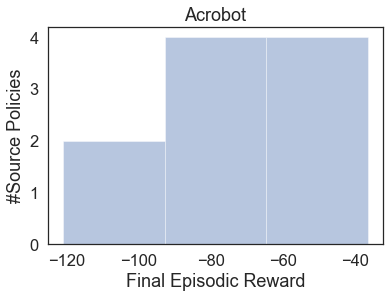

In [7]:
for env in mean_rewards:
    ax = sns.distplot(mean_rewards[env], kde= False, norm_hist=False)
    ax.set_title(env[:-3])
    ax.set_xlabel('Final Episodic Reward')
    ax.set_ylabel('#Source Policies')
    ax.figure.savefig("logs/{}_analysis/{}.pdf".format(env, env), bbox_inches='tight', format='pdf', dpi=300)
    plt.show()